## KERNELS
- We think of an image as a big matrix, then we can think of a kernel or convolutional matrix as a tiny matrix that is used for blurring, sharpening, edge detection, and other image processing functions.


## MORPHOLOGICAL OPERATIONS

- Morphological operations are simple transformations applied to binary or grayscale images.
- More specifically, we apply morphological operations to shapes and structures inside of images.
- Morphological operations “probe” an image with a structuring element.
- This structuring element defines the neighborhood to be examined around each pixel.
- And based on the given operation and the size of the structuring element we are able to adjust our output image.
- Structuring element is a type of kernel or mask. However, instead of applying a convolution, we are only going to perform simple tests on the pixels.

In [1]:
import cv2
import argparse
from cv_imshow import display_image

In [2]:
args = {
    "image":"../images/pyimagesearch_logo.png",
    "cimage":"../images/morph_car.png"
}

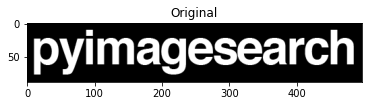

In [3]:
# load the image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image("Original", image)

### Erosion: 
- A foreground pixel in the input image will be kept only if ALL pixels inside the structuring element are > 0. Otherwise, the pixels are set to 0 (i.e. background).
- Useful for removing small blobs in an image or disconnecting two connected objects.

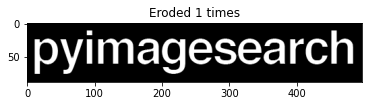

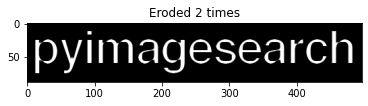

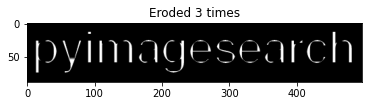

In [4]:
for i in range(0,3):
    eroded = cv2.erode(gray.copy(), None, iterations=i+1)
    display_image("Eroded {} times".format(i+1), eroded)

### Dilation: 
- Opposite of erosion. Utilizes structuring elements - a center pixel p of the structuring element is set to white if ANY pixel in the structuring element is > 0. 
- Useful for joining broken parts of an image together.

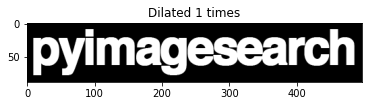

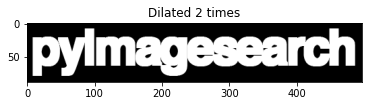

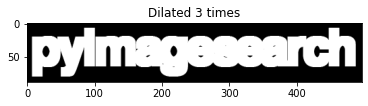

In [5]:
for i in range(0,3):
    dilated = cv2.dilate(gray.copy(), None, iterations=i+1)
    display_image("Dilated {} times".format(i+1), dilated)

3) Opening: Eroson followed by dilation.
allows us to remove small blobs from an image:
first an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object.

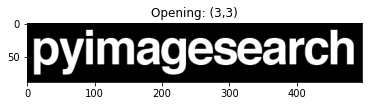

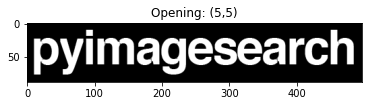

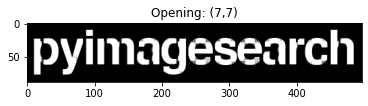

In [6]:
kernels = [(3,3), (5,5), (7,7)]

for kernelSize in kernels:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    display_image("Opening: ({},{})".format(kernelSize[0],kernelSize[1]), opening)

4) Closing: Dilation folowed by erosion
closing is used to close holes inside of objects or for connecting components together.

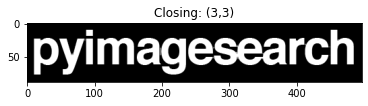

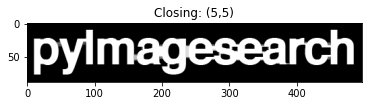

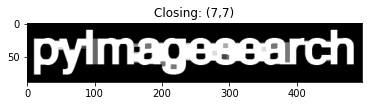

In [7]:
for kernelSize in kernels:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    display_image("Closing: ({},{})".format(kernelSize[0],kernelSize[1]), closing)

### Morphological gradient: 
- Difference between erosion and dilation
- Useful for determining the outline of a particular object of an image

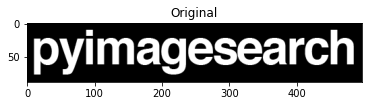

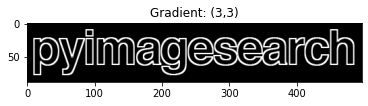

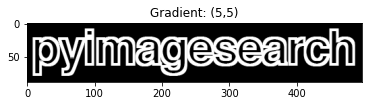

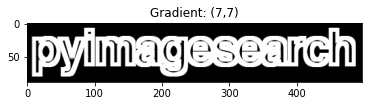

In [8]:
display_image("Original", image)

for kernelSize in kernels:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    grad = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
    display_image("Gradient: ({},{})".format(kernelSize[0],kernelSize[1]), grad)

### Top Hat/white hat: 
- Difference between original(grayscale) image and opening
- Used to reveal bright regions of an image on dark backgrounds.

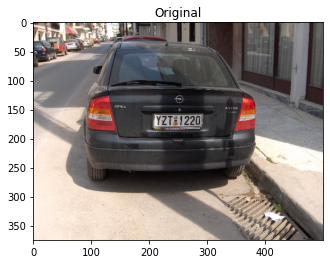

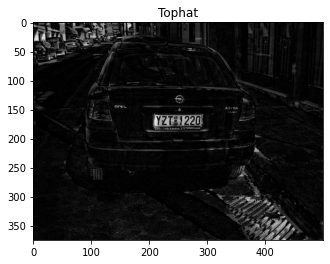

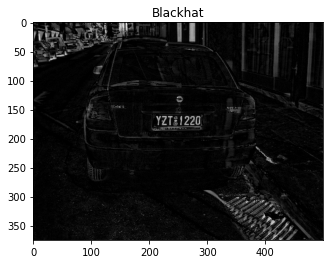

In [9]:
carImage = cv2.imread(args["cimage"])
carGray = cv2.cvtColor(carImage, cv2.COLOR_BGR2GRAY)
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13,5))
blackhat = cv2.morphologyEx(carGray, cv2.MORPH_BLACKHAT, rectKernel)
tophat = cv2.morphologyEx(carGray, cv2.MORPH_TOPHAT, rectKernel)

display_image("Original", carImage)
display_image("Tophat", tophat)
display_image("Blackhat", blackhat)